In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Reading the data
Data1=pd.read_excel("E:\\....\\DataSets\\datacleaned.xlsx")

In [83]:
# First ten rows
Data1.head(10)

,Unnamed: 0,Year,Zone_EN,Coordinates,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,0,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Expat,8,243,251,0.9681
1,1,2015,Ajman,"25.244000,55.266140",Public Schools,Female,Local,20,353,373,0.9464
2,2,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Expat,28,182,210,0.8667
3,3,2015,Ajman,"25.244000,55.266140",Public Schools,Male,Local,23,262,285,0.9193
4,4,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Expat,11,424,435,0.9747
5,5,2015,Ajman,"25.244000,55.266140",Private Schools,Female,Local,0,13,13,1.0000
6,6,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Expat,42,535,577,0.9272
7,7,2015,Ajman,"25.244000,55.266140",Private Schools,Male,Local,16,58,74,0.7838
8,8,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Expat,26,50,76,0.6579
9,9,2015,Ajman,"25.244000,55.266140",Continuing Education Centers,Female,Local,35,48,83,0.5783


In [77]:
# Overall information about the data
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 401 non-null    int64  
 1   Year                       401 non-null    int64  
 2   Zone_EN                    401 non-null    object 
 3   Coordinates                333 non-null    object 
 4   School_Type_EN             401 non-null    object 
 5   Gender_EN                  401 non-null    object 
 6   LocalFlag_EN               401 non-null    object 
 7   Number of Failed students  401 non-null    int64  
 8   Number of Pass students    401 non-null    int64  
 9   Total Number of Students   401 non-null    int64  
 10  Graduation %               401 non-null    float64
dtypes: float64(1), int64(5), object(5)
memory usage: 34.6+ KB


In [11]:
# Unique values of 'Year' column
unique_values_Year = Data1['Year'].unique()
print(unique_values_Year)

[2015 2016 2017 2018 2019]


In [12]:
# Unique values of 'Zone_EN' column
unique_values_Zone_EN = Data1['Zone_EN'].unique()
print(unique_values_Zone_EN)

['Ajman' 'Fujairah' 'DUBAI' 'Ras AlKhaima' 'Sharjah' 'Umm AlQuwain']


In [13]:
# Unique values of 'School_Type_EN' column
unique_values_School_Type_EN = Data1['School_Type_EN'].unique()
print(unique_values_School_Type_EN)

['Public Schools' 'Private Schools' 'Continuing Education Centers'
 'ACTVET']


In [15]:
# Dropping columns
columns_to_drop = ['Coordinates', 'Number of Failed students', 'Number of Pass students','Total Number of Students']
Data2 = Data1.drop(columns=columns_to_drop)

In [78]:
# Dataset after dropping columns
Data2.head()

,Unnamed: 0,Year,Zone_EN,School_Type_EN,Gender_EN,LocalFlag_EN,Graduation %
0,0,2015,Ajman,Public Schools,Female,Expat,0.9681
1,1,2015,Ajman,Public Schools,Female,Local,0.9464
2,2,2015,Ajman,Public Schools,Male,Expat,0.8667
3,3,2015,Ajman,Public Schools,Male,Local,0.9193
4,4,2015,Ajman,Private Schools,Female,Expat,0.9747


In [84]:
# Checking for null values
Data2.isnull().sum()

Unnamed: 0        0
Year              0
Zone_EN           0
School_Type_EN    0
Gender_EN         0
LocalFlag_EN      0
Graduation %      0
dtype: int64

In [85]:
# Datatypes of the columns
Data2.dtypes

Unnamed: 0          int64
Year                int64
Zone_EN            object
School_Type_EN     object
Gender_EN          object
LocalFlag_EN       object
Graduation %      float64
dtype: object

In [21]:
# Converting categorical data into numerical form 
one_hot_encoded = pd.get_dummies(Data2, columns=['Zone_EN', 'School_Type_EN','Gender_EN','LocalFlag_EN'])

In [22]:
# Data set after one hot encoded
one_hot_encoded.head(10)

,Unnamed: 0,Year,Graduation %,Zone_EN_Ajman,Zone_EN_DUBAI,Zone_EN_Fujairah,Zone_EN_Ras AlKhaima,Zone_EN_Sharjah,Zone_EN_Umm AlQuwain,School_Type_EN_ACTVET,School_Type_EN_Continuing Education Centers,School_Type_EN_Private Schools,School_Type_EN_Public Schools,Gender_EN_Female,Gender_EN_Male,LocalFlag_EN_Expat,LocalFlag_EN_Local
0,0,2015,0.9681,1,0,0,0,0,0,0,0,0,1,1,0,1,0
1,1,2015,0.9464,1,0,0,0,0,0,0,0,0,1,1,0,0,1
2,2,2015,0.8667,1,0,0,0,0,0,0,0,0,1,0,1,1,0
3,3,2015,0.9193,1,0,0,0,0,0,0,0,0,1,0,1,0,1
4,4,2015,0.9747,1,0,0,0,0,0,0,0,1,0,1,0,1,0
5,5,2015,1.0000,1,0,0,0,0,0,0,0,1,0,1,0,0,1
6,6,2015,0.9272,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,7,2015,0.7838,1,0,0,0,0,0,0,0,1,0,0,1,0,1
8,8,2015,0.6579,1,0,0,0,0,0,0,1,0,0,1,0,1,0
9,9,2015,0.5783,1,0,0,0,0,0,0,1,0,0,1,0,0,1


In [23]:
# Reducing features by deleting one column in each categorical feature
columns_to_drop = ['Zone_EN_Umm AlQuwain', 'School_Type_EN_Public Schools', 'Gender_EN_Male','LocalFlag_EN_Local']
Data3 = one_hot_encoded.drop(columns=columns_to_drop)

In [79]:
# Datset after reducing the feature
Data3.head()

,Unnamed: 0,Year,Graduation %,Zone_EN_Ajman,Zone_EN_DUBAI,Zone_EN_Fujairah,Zone_EN_Ras AlKhaima,Zone_EN_Sharjah,School_Type_EN_ACTVET,School_Type_EN_Continuing Education Centers,School_Type_EN_Private Schools,Gender_EN_Female,LocalFlag_EN_Expat
0,0,2015,0.9681,1,0,0,0,0,0,0,0,1,1
1,1,2015,0.9464,1,0,0,0,0,0,0,0,1,0
2,2,2015,0.8667,1,0,0,0,0,0,0,0,0,1
3,3,2015,0.9193,1,0,0,0,0,0,0,0,0,0
4,4,2015,0.9747,1,0,0,0,0,0,0,1,1,1


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Dataset is split into input features and the target variable
X = Data3[['Year', 'Zone_EN_Ajman','Zone_EN_DUBAI','Zone_EN_Fujairah','Zone_EN_Ras AlKhaima','Zone_EN_Sharjah','School_Type_EN_ACTVET','School_Type_EN_Continuing Education Centers','School_Type_EN_Private Schools','Gender_EN_Female','LocalFlag_EN_Expat']].values
y = Data3['Graduation %'].values

In [32]:
# Standardizing the input features so that they are in common scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
# Splitting dataset into train and test dataset
test_size = 0.2  
random_state = 42 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

##  1)Polynomial Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Fitting the model
lin = LinearRegression()
 
lin.fit(X, y)

LinearRegression()

In [63]:
# Fit a polynomial regression model
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

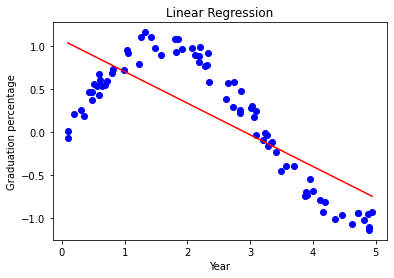

In [64]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='blue')
 
plt.plot(X, lin.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Graduation percentage')
 
plt.show()

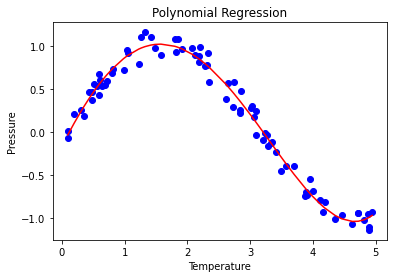

In [65]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color='blue')
 
plt.plot(X, lin2.predict(poly.fit_transform(X)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

In [76]:
degree = 1
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [75]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [72]:
# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

In [73]:
# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Calculate R-squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train Mean Squared Error: {mse_train:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Train R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

Train Mean Squared Error: 0.0073
Test Mean Squared Error: 0.0104
Train R-squared: 0.7010
Test R-squared: 0.7053


Train Mean Squared Error (Train MSE): 
This value, 0.0073, represents the average squared difference between the actual target values and the predicted values made by the model on the training dataset. A lower train MSE indicates that the model's predictions are closer to the actual values on the training data.

Test Mean Squared Error (Test MSE): 
This value, 0.0104, represents the average squared difference between the actual target values and the predicted values on the testing dataset. The test MSE helps to assess how well the model generalizes to new, unseen data. Like the train MSE, a lower test MSE indicates that the model's predictions are closer to the actual values on the testing data.

Train R-squared (Train R²): 
An R² value of 0.7010 for the training set means that approximately 70.10% of the variance in the actual target variable is explained by your model's predictions on the training data. 

Test R-squared (Test R²): An R² value of 0.7053 for the test set indicates that around 70.53% of the variance in the actual target variable is explained by your model's predictions on the testing data.

Both of these R² values being above 0.5 (or 50%) indicates that the model is performing better than a simple mean prediction, at least in terms of explaining the variability. 


 ## 2)Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Lasso regression model
alpha = 0.01  # Regularization strength
model = Lasso(alpha=alpha)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate Mean Squared Error and R-squared
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train Mean Squared Error: {mse_train:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Train R-squared: {r2_train:.4f}")
print(f"Test R-squared: {r2_test:.4f}")

# Print the coefficients of the model
print("Coefficients:", model.coef_)

Train Mean Squared Error: 0.0079
Test Mean Squared Error: 0.0122
Train R-squared: 0.6787
Test R-squared: 0.6561
Coefficients: [ 0.00684264  0.          0.00595803 -0.          0.          0.
  0.         -0.11786417 -0.          0.          0.        ]


Train Mean Squared Error (Train MSE): 
An MSE of 0.0079 for the training set indicates that, on average, the squared difference between your model's predictions and the actual values in the training data is 0.0079

Test Mean Squared Error (Test MSE): 
An MSE of 0.0122 for the test set indicates that, on average, the squared difference between your model's predictions and the actual values in the test data is 0.0122.

Both of these MSE values being relatively low suggests that Lasso model's predictions are accurate and are not deviating significantly from the actual values. 

Train R-squared (Train R²): 
An R² value of 0.6787 for the training set means that approximately 67.87% of the variance in the actual target variable is explained by the model's predictions on the training data

Test R-squared (Test R²): 
An R² value of 0.6561 for the test set indicates that around 65.61% of the variance in the actual target variable is explained by your model's predictions on the testing data. 

Both of these R² values being above 0.5 (or 50%) indicates that Lasso model is performing better than a simple mean prediction, at least in terms of explaining the variability.